# Reservas de Hotel

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

df = pd.read_csv('processed.csv')

### Porcentagem de cancelamento

In [2]:
print(df['is_canceled'].value_counts(normalize=True).to_string(header=False))


0    0.628222
1    0.371778


* 0: Não cancelado
* 1: Cancelado

### Tipo do hotel

In [3]:
print(df['hotel'].value_counts(normalize=True).to_string(header=False))

City Hotel      0.666602
Resort Hotel    0.333398


### Data de chegada

In [4]:
print('Mais antiga:' ,df["arrival_date"].min())
print('Mais recente:' ,df["arrival_date"].max())


Mais antiga: 2015-07-01
Mais recente: 2017-08-31


### Data de Reserva

In [5]:
print('Mais antiga:' ,df["reservation_status_date"].min())
print('Mais recente:' ,df["reservation_status_date"].max())

Mais antiga: 2014-10-17
Mais recente: 2017-09-14


### Gráfico: Meses de chegada

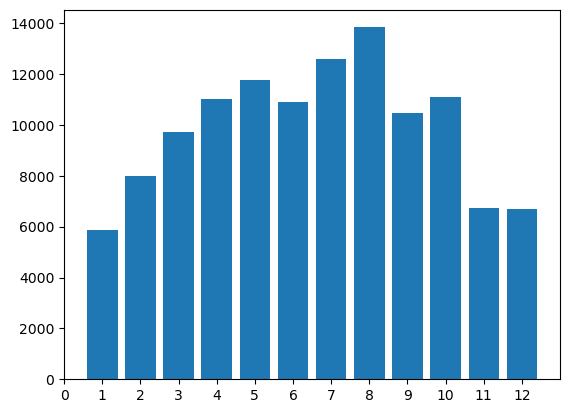

In [6]:
counts = np.bincount(df['arrival_date_month'])
fig, ax = plt.subplots()
ax.bar(range(0,13), counts, width=0.8, align='center')
ax.set(xticks=range(0,13), xlim=[0,13])
plt.show()

O hotel recebe mais pessoas no meio do ano, 
sendo agosto o mês de maior movimento, em uma distribuição similar a normal.

### Total guests

In [7]:
df[['adults','children','babies']].describe(percentiles=[.05,.25,.75,.95,.99])


,adults,children,babies
count,118732.000000,118732.000000,118732.000000
mean,1.861065,0.104353,0.007959
std,0.574697,0.399432,0.097448
min,0.000000,0.000000,0.000000
5%,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000
95%,3.000000,1.000000,0.000000
99%,3.000000,2.000000,0.000000


Individualmente, cada um desses valores não costuma ultrapassar de 2 ou 3, mas existem casos que extrapolam esses valores.

In [8]:
print(df['babies'].value_counts().sort_index().to_string(header=False))

0     117818
1        898
2         14
9          1
10         1


In [9]:
print(df['children'].value_counts().to_string(header=False))

0     110153
1       4852
2       3650
3         76
10         1


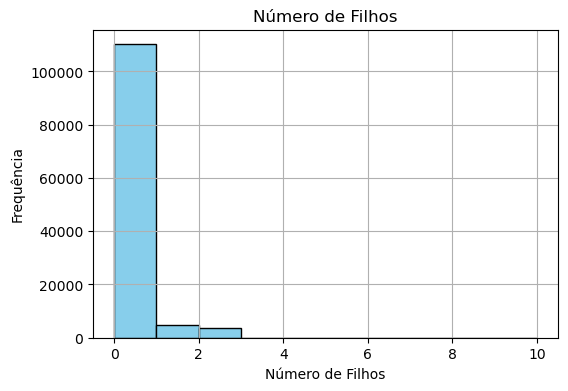

In [10]:
plt.figure(figsize=(6, 4))
plt.hist(df['children'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Número de Filhos')
plt.ylabel('Frequência')
plt.title('Número de Filhos')
plt.grid(True)
plt.show()

In [11]:
print(df['adults'].value_counts().sort_index().to_string(header=False))

0       223
1     22735
2     89498
3      6198
4        62
5         2
6         1
10        1
20        2
26        5
27        2
40        1
50        1
55        1


In [12]:
print(df['total_guests'].describe(percentiles=[.05,.25,.75,.95,.99]).to_string(header=False))

count    118732.000000
mean          1.973377
std           0.718540
min           1.000000
5%            1.000000
25%           2.000000
50%           2.000000
75%           2.000000
95%           3.000000
99%           4.000000
max          55.000000


### Pedidos Especiais

Ex.: Cama de solteiro ou piso superior

In [13]:
df["total_of_special_requests"].sum()

67891

### Country

In [51]:
countries = (df.loc[df["is_canceled"] == 0, "country"].value_counts().sort_values(ascending=False)
             .to_frame(name='Guests') .reset_index().rename(columns={'index': 'Country'}))
total_hospedes = countries["Guests"].sum()
countries["Percent"] = round(countries["Guests"] / total_hospedes * 100, 2)
print ("País\tHóspedes\tPorcentagem")
print(countries.to_string(index=False,header=False))

País	Hóspedes	Porcentagem
PRT 20977 28.12
GBR  9668 12.96
FRA  8468 11.35
ESP  6383  8.56
DEU  6067  8.13
IRL  2542  3.41
ITA  2428  3.26
BEL  1868  2.50
NLD  1716  2.30
USA  1592  2.13
BRA  1392  1.87
CHE  1298  1.74
AUT  1033  1.38
 CN  1025  1.37
SWE   793  1.06
POL   703  0.94
CHN   537  0.72
ISR   500  0.67
NOR   426  0.57
RUS   391  0.52
FIN   377  0.51
ROU   366  0.49
DNK   326  0.44
AUS   319  0.43
LUX   177  0.24
JPN   169  0.23
ARG   160  0.21
AGO   157  0.21
HUN   153  0.21
MAR   150  0.20
TUR   146  0.20
CZE   134  0.18
IND   116  0.16
SRB    98  0.13
GRC    93  0.12
DZA    82  0.11
KOR    78  0.10
HRV    75  0.10
MEX    75  0.10
LTU    74  0.10
NZL    68  0.09
EST    65  0.09
BGR    63  0.08
IRN    59  0.08
ISL    53  0.07
ZAF    49  0.07
CHL    49  0.07
UKR    48  0.06
COL    48  0.06
MOZ    48  0.06
LVA    46  0.06
THA    41  0.05
SVN    41  0.05
SVK    41  0.05
CYP    40  0.05
TWN    37  0.05
MYS    25  0.03
URY    23  0.03
PER    23  0.03
SGP    22  0.03
LBN    22  0.0

In [26]:

pie = px.pie(countries, values="Hóspedes", names="País", title="Países dos Hóspedes", template="seaborn")
pie.update_traces(textposition="inside", textinfo="value+percent+label")
pie.show()

In [ ]:
df["is_canceled"] == 0

0          True
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8         False
9         False
10        False
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27        False
28         True
29         True
30         True
31        False
32         True
33        False
34        False
35         True
36         True
37        False
38         True
39        False
40         True
41         True
42         True
43         True
44        False
45         True
46         True
47         True
48         True
49         True
50         True
51         True
52         True
53         True
54         True
55         True
56         True
57         True
58         True
59         True
60         True
61         True
62      